In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [2]:
df_train = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv")

In [3]:
print("Shape of Training data: ", df_train.shape)
print("Shape of Testing data: ", df_test.shape)

Shape of Training data:  (20800, 5)
Shape of Testing data:  (5200, 4)


In [4]:
class_labels  = df_train['label'].values.tolist()
class_labels_set = set(class_labels)

freq_list = []

for c in class_labels_set:
    freq_list.append(class_labels.count(c))

print ('Freq',freq_list)
print ('number',class_labels_set)

Freq [10387, 10413]
number {0, 1}


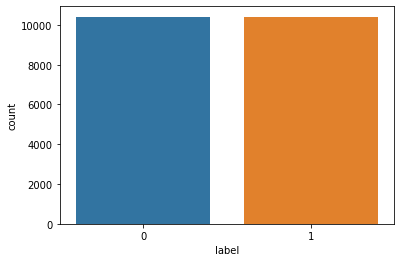

In [5]:
import seaborn as sns
ax = sns.countplot(x="label",data=df_train)

In [6]:
df_train.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [7]:
df_train.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [8]:
df = df_train.drop(["id", "title", "author"], axis = 1)

In [9]:
print("Null values in train data:")
print(df_train.isnull().sum())
print('\n\n')

print("Null values in test data:")
print(df_test.isnull().sum())

Null values in train data:
id           0
title      558
author    1957
text        39
label        0
dtype: int64



Null values in test data:
id          0
title     122
author    503
text        7
dtype: int64


In [15]:
df_d= df.dropna()

In [16]:
df_d.isnull().sum()

text     0
label    0
dtype: int64

In [18]:
df=df_d

In [19]:
df = df.sample(frac = 1)

In [20]:
df.head(10)

,text,label
15634,"In the park, there are 9, 485 of them. You sit...",0
16205,The American Voter The American Voter \nEvery ...,1
1190,ISTANBUL — Six years of war in Syria have r...,0
20303,ROME — Two passenger trains collided in t...,0
15876,"I know, the number of big books out each fall ...",0
228,"October 28, 2016 112 While the Western press c...",1
363,Doctors Restore Ken Burns’ Full-Color Vision A...,1
15439,Taxpayers in Seattle will soon be paying for i...,0
11565,In an appearance on Fox News Channel’s “Americ...,0
3270,0 комментариев 1 поделились \nКак заявили в Го...,1


In [21]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [22]:
df.columns

Index(['text', 'label'], dtype='object')

In [23]:
df.head()

,text,label
0,"In the park, there are 9, 485 of them. You sit...",0
1,The American Voter The American Voter \nEvery ...,1
2,ISTANBUL — Six years of war in Syria have r...,0
3,ROME — Two passenger trains collided in t...,0
4,"I know, the number of big books out each fall ...",0


In [24]:
x = df["text"]
y = df["label"]
x.shape, y.shape

((20761,), (20761,))

In [25]:
x

0        In the park, there are 9, 485 of them. You sit...
1        The American Voter The American Voter \nEvery ...
2        ISTANBUL  —   Six years of war in Syria have r...
3        ROME  —   Two passenger trains collided   in t...
4        I know, the number of big books out each fall ...
                               ...                        
20756    Mitt Romney was excoriated during the 2012 pre...
20757    NTEB Ads Privacy Policy NY Daily News And Near...
20758    Jenice Armstrong, Philly, October 26, 2016 \nT...
20759    SEOUL, South Korea  —   She is facing impeachm...
20760    By Allison Vincent Election 2016 , News , Poli...
Name: text, Length: 20761, dtype: object

In [26]:
y

0        0
1        1
2        0
3        0
4        0
        ..
20756    0
20757    1
20758    1
20759    0
20760    1
Name: label, Length: 20761, dtype: int64

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=100)

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [65]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.BuGn):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
pred_lr=LR.predict(xv_test)

In [69]:
LR.score(xv_test, y_test)

0.9423239012642987

In [35]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2598
           1       0.94      0.95      0.95      2593

    accuracy                           0.94      5191
   macro avg       0.94      0.94      0.94      5191
weighted avg       0.94      0.94      0.94      5191



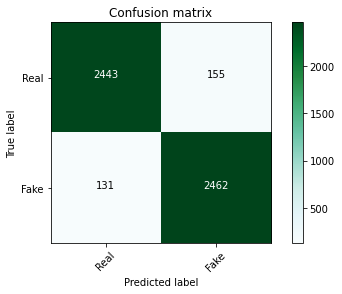

In [36]:
cm = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

## MultinomialNB

In [38]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(xv_train, y_train)
pred = NB.predict(xv_test)
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(xv_test, y_test)))

Accuracy of NB classifier on test set: 0.84


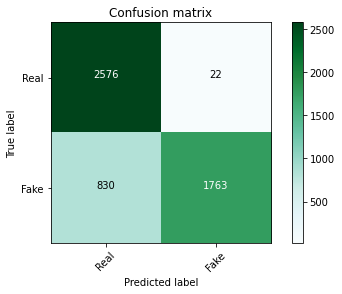

In [39]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      2598
           1       0.99      0.68      0.81      2593

    accuracy                           0.84      5191
   macro avg       0.87      0.84      0.83      5191
weighted avg       0.87      0.84      0.83      5191



## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
pred_dt = DT.predict(xv_test)

In [45]:
DT.score(xv_test, y_test)

0.8857638219996147

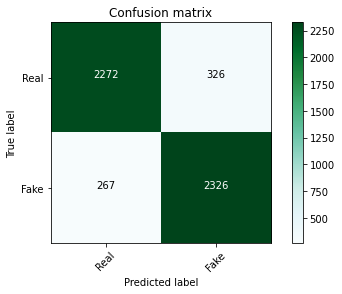

In [46]:
cm = metrics.confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [47]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2598
           1       0.88      0.90      0.89      2593

    accuracy                           0.89      5191
   macro avg       0.89      0.89      0.89      5191
weighted avg       0.89      0.89      0.89      5191



## KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xv_train, y_train)
pred_knn = knn.predict(xv_test)
print(knn.score(xv_test, y_test))
print(classification_report(y_test, pred_knn))

0.6621074937391639
              precision    recall  f1-score   support

           0       0.94      0.35      0.51      2598
           1       0.60      0.98      0.74      2593

    accuracy                           0.66      5191
   macro avg       0.77      0.66      0.62      5191
weighted avg       0.77      0.66      0.62      5191



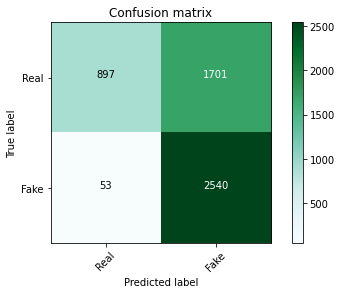

In [50]:
#k=3
cm = metrics.confusion_matrix(y_test, pred_knn)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [52]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(xv_train, y_train)
pred_knn = knn.predict(xv_test)
print(knn.score(xv_test, y_test))
print(classification_report(y_test, pred_knn))

0.7096898478135234
              precision    recall  f1-score   support

           0       0.90      0.47      0.62      2598
           1       0.64      0.95      0.77      2593

    accuracy                           0.71      5191
   macro avg       0.77      0.71      0.69      5191
weighted avg       0.77      0.71      0.69      5191



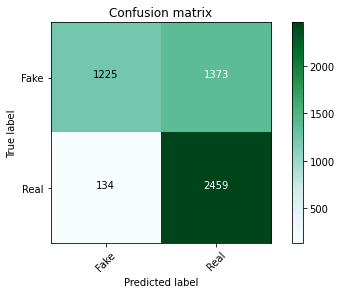

In [53]:
cm = metrics.confusion_matrix(y_test, pred_knn)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

<h2> Passive Agressive Classifier 

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier()
pac.fit(xv_train,y_train)

In [ ]:
y_pac=pac.predict(xv_test)

In [ ]:
accuracy_score(y_test,y_pac)